<h1 align=center><font size = 8>Capestone Project: Cafes in Casablanca </font></h1>

## Introduction

If there is a business that works in Morocco, it's the cafes. They may be adjoining, whether in large avenues or in alleys, yet they are always full. There is cafes for all ranges, for all budgets, whether franchised or branded locally. The demand therefore still exists, fueled by this historic Moroccan culture of "take a coffee" to get some fresh air after a day of work or the weekend, to make an appointment or even to discuss business. The competition between cafes also exists, but does not seem to harm this business. Moreover, the cafe owners contacted confirm to be competing strongly by newcomers but still succeed in pulling out of the game This is precisely what has pushed many people to invest in this area. It must be said that with an investment, barely therefore, sustainable costs, profitability is very interesting.

I've already mentioned all the sources of data that I used in this project in the report and the presentation, i found some difficulties to find a complete data for this project so i used many websites in the net, and unfortunately they don't give permission to get the database so was in the obligation to create it myself using all the data that i get visually from those websites

we start by loading our data into a dataframe

## 1.Handling the data

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-base-1.15.4          |   py36h81de0dd_0         4.2 MB  anaconda
    numpy-1.15.4               |   py36h1d66e8a_0          35 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    mkl_fft-1.0.6              |   py36h7dd41cf_0         150 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
    scipy-1.1.0                |   py36hfa4b5c9_1        18.0 MB  anaconda
  

In [3]:
import pandas as pd
df = pd.read_excel('cities.xlsx')
df

,ville,quartier,Latitude,Longitude
0,Casablanca,Aïn Chock,33.532720,-7.617050
1,Casablanca,Aïn Sebaâ,33.601560,-7.545370
2,Casablanca,Hay Mohammadi,33.583580,-7.561269
3,Casablanca,Roches Noires,33.599420,-7.585870
4,Casablanca,Anfa,33.594150,-7.646590
5,Casablanca,Maârif,33.580260,-7.630220
6,Casablanca,Sidi Belyout,33.593050,-7.613160
7,Casablanca,Ben M'sick,33.555340,-7.581560
8,Casablanca,Sbata,33.530150,-7.566230
9,Casablanca,Sidi Bernoussi,33.610870,-7.504090


let's import the libraries we're going to use in the rest of our project

In [4]:
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.20.0-py_0       conda-forge

The following p

let's get first the geographical coordinates of the country

In [6]:
address = 'Morocco'

geolocator = Nominatim(user_agent="morocco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Morocco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Morocco are 31.1728205, -7.3362482.


let's visualize our data in a map

In [7]:
import folium
# create map of Morocco using latitude and longitude values

map_maroc = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, ville, quartier in zip(df['Latitude'], df['Longitude'],df['ville'], df['quartier']):
    label = '{}, {}'.format(quartier, ville)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_maroc)  
    
map_maroc

let's focus on Casablanca now

In [8]:
casablanca_data = df[df['ville'] == 'Casablanca'].reset_index(drop=True)
casablanca_data.head()


,ville,quartier,Latitude,Longitude
0,Casablanca,Aïn Chock,33.53272,-7.617050
1,Casablanca,Aïn Sebaâ,33.60156,-7.545370
2,Casablanca,Hay Mohammadi,33.58358,-7.561269
3,Casablanca,Roches Noires,33.59942,-7.585870
4,Casablanca,Anfa,33.59415,-7.646590


In [9]:
address = 'Casablanca'

geolocator = Nominatim(user_agent="casablanca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Casablanca are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Casablanca are 33.5950627, -7.6187768.


In [10]:
# create map of Casablanca using latitude and longitude values
map_casablanca = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(casablanca_data['Latitude'], casablanca_data['Longitude'], casablanca_data['quartier']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_casablanca)  
    
map_casablanca

In [12]:
CLIENT_ID = 'IMUADPNF1EHM4BWPKOKK53BAQIFHLKOW0ZMF1Q5MNVHL0KMV' # your Foursquare ID
CLIENT_SECRET = '0IEHYAFMDJAURWE5DTQ3X4C4WXRSENFN1Z1NNPMEPDGBULAE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IMUADPNF1EHM4BWPKOKK53BAQIFHLKOW0ZMF1Q5MNVHL0KMV
CLIENT_SECRET:0IEHYAFMDJAURWE5DTQ3X4C4WXRSENFN1Z1NNPMEPDGBULAE


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [13]:
casablanca_data.loc[0, 'quartier']

'Aïn Chock'

Get the neighborhood's latitude and longitude values.

In [14]:
quartier_latitude = casablanca_data.loc[0, 'Latitude'] # neighborhood latitude value
quartier_longitude = casablanca_data.loc[0, 'Longitude'] # neighborhood longitude value

quartier_name = casablanca_data.loc[0, 'quartier'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(quartier_name, 
                                                               quartier_latitude, 
                                                               quartier_longitude))

Latitude and longitude values of Aïn Chock are 33.53272, -7.61705.


#### Now, let's get the top 100 venues that are in this neighborhood within a radius of 1000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    quartier_latitude, 
    quartier_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IMUADPNF1EHM4BWPKOKK53BAQIFHLKOW0ZMF1Q5MNVHL0KMV&client_secret=0IEHYAFMDJAURWE5DTQ3X4C4WXRSENFN1Z1NNPMEPDGBULAE&v=20180605&ll=33.53272,-7.61705&radius=1000&limit=100'

Send the GET request and examine the resutl

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5de910f677af03464fa0fa2c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Aïn Chock',
  'headerFullLocation': 'Aïn Chock, Casablanca',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 33.54172000900001,
    'lng': -7.606273221004403},
   'sw': {'lat': 33.523719990999986, 'lng': -7.627826778995597}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dcf8cc41f6eb122709747a3',
       'name': 'Les Quatre Cerises',
       'location': {'lat': 33.53452815570695,
        'lng': -7.611006613855835,
        'labeledLatLngs': [{'label': 'display',
          'lat': 33.53452815570695,
          'lng': 

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [18]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Les Quatre Cerises,Bakery,33.534528,-7.611007
1,Idouar Ice,Coffee Shop,33.533901,-7.612866
2,Café ANTIK,Coffee Shop,33.532062,-7.616460
3,Fragola Gelato,Coffee Shop,33.535425,-7.609501
4,West Village Café,Café,33.533885,-7.614602
5,Tacos De Lyon (Al qods),Fast Food Restaurant,33.535434,-7.609242
6,Casdal,Fast Food Restaurant,33.531306,-7.615592
7,Grain De Blé,Bakery,33.532344,-7.615915
8,Antik Sushi,Sushi Restaurant,33.532279,-7.616656
9,Timitar,Fast Food Restaurant,33.532885,-7.613989


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Casablanca

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['quartier', 
                  'quartier Latitude', 
                  'quartier Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
casablanca_venues = getNearbyVenues(names=casablanca_data['quartier'],
                                   latitudes=casablanca_data['Latitude'],
                                   longitudes=casablanca_data['Longitude']
                                  )

Aïn Chock
Aïn Sebaâ
Hay Mohammadi
Roches Noires
Anfa
Maârif
Sidi Belyout
Ben M'sick
Sbata
Sidi Bernoussi
Sidi Moumen
Al Fida
Mers Sultan
Hay Hassani
Moulay Rachid
Sidi Othmane


#### Let's check the size of the resulting dataframe

In [23]:
print(casablanca_venues.shape)
casablanca_venues.head()

(126, 7)


,quartier,quartier Latitude,quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aïn Chock,33.53272,-7.61705,Idouar Ice,33.533901,-7.612866,Coffee Shop
1,Aïn Chock,33.53272,-7.61705,Café ANTIK,33.532062,-7.616460,Coffee Shop
2,Aïn Chock,33.53272,-7.61705,West Village Café,33.533885,-7.614602,Café
3,Aïn Chock,33.53272,-7.61705,Casdal,33.531306,-7.615592,Fast Food Restaurant
4,Aïn Chock,33.53272,-7.61705,Grain De Blé,33.532344,-7.615915,Bakery


Let's check how many venues were returned for each neighborhood

In [24]:
casablanca_venues.groupby('quartier').count()

,quartier Latitude,quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
quartier,,,,,,
Al Fida,2,2,2,2,2,2
Anfa,18,18,18,18,18,18
Aïn Chock,7,7,7,7,7,7
Aïn Sebaâ,3,3,3,3,3,3
Ben M'sick,3,3,3,3,3,3
Hay Hassani,3,3,3,3,3,3
Hay Mohammadi,2,2,2,2,2,2
Maârif,14,14,14,14,14,14
Mers Sultan,6,6,6,6,6,6


#### Let's find out how many unique categories can be curated from all the returned venues

In [25]:
print('There are {} uniques categories.'.format(len(casablanca_venues['Venue Category'].unique())))

There are 60 uniques categories.


## 3. Analyze Each Neighborhood

In [26]:
# one hot encoding
casablanca_onehot = pd.get_dummies(casablanca_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
casablanca_onehot['quartier'] = casablanca_venues['quartier'] 

# move neighborhood column to the first column
fixed_columns = [casablanca_onehot.columns[-1]] + list(casablanca_onehot.columns[:-1])
casablanca_onehot = casablanca_onehot[fixed_columns]

casablanca_onehot.head()

,quartier,African Restaurant,American Restaurant,Athletics & Sports,Bakery,Bar,Beach,Big Box Store,Bistro,Burrito Place,...,Snack Place,Soup Place,Spa,Spanish Restaurant,Sports Club,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tram Station,Wings Joint
0,Aïn Chock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aïn Chock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aïn Chock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aïn Chock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aïn Chock,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
casablanca_onehot.shape

(126, 61)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
casablanca_grouped = casablanca_onehot.groupby('quartier').mean().reset_index()
casablanca_grouped

,quartier,African Restaurant,American Restaurant,Athletics & Sports,Bakery,Bar,Beach,Big Box Store,Bistro,Burrito Place,...,Snack Place,Soup Place,Spa,Spanish Restaurant,Sports Club,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tram Station,Wings Joint
0,Al Fida,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,Anfa,0.000000,0.000000,0.0,0.000000,0.000000,0.055556,0.055556,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.055556,0.000000,0.000000,0.0,0.000000
2,Aïn Chock,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.142857,0.000000,0.0,0.000000
3,Aïn Sebaâ,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.000000
4,Ben M'sick,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5,Hay Hassani,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
6,Hay Mohammadi,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.5,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.000000
7,Maârif,0.071429,0.000000,0.0,0.000000,0.071429,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.071429,0.000000,0.0,0.000000
8,Mers Sultan,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,...,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
9,Moulay Rachid,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


#### Let's confirm the new size

In [29]:
casablanca_grouped.shape

(16, 61)

In [30]:
num_top_venues = 5

for hood in casablanca_grouped['quartier']:
    print("----"+hood+"----")
    temp = casablanca_grouped[casablanca_grouped['quartier'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Al Fida----
                venue  freq
0  Athletics & Sports   0.5
1                Café   0.5
2  African Restaurant   0.0
3          Restaurant   0.0
4           Juice Bar   0.0


----Anfa----
                 venue  freq
0                  Pub  0.17
1                 Café  0.11
2          Pizza Place  0.11
3                Diner  0.06
4  Japanese Restaurant  0.06


----Aïn Chock----
                  venue  freq
0  Fast Food Restaurant  0.29
1           Coffee Shop  0.29
2                  Café  0.14
3                Bakery  0.14
4      Sushi Restaurant  0.14


----Aïn Sebaâ----
                  venue  freq
0      Tapas Restaurant  0.33
1         Burrito Place  0.33
2  Fast Food Restaurant  0.33
3    African Restaurant  0.00
4             Racetrack  0.00


----Ben M'sick----
              venue  freq
0              Café  0.67
1    Sandwich Place  0.33
2        Restaurant  0.00
3         Juice Bar  0.00
4  Kebab Restaurant  0.00


----Hay Hassani----
                venue  freq


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhoo

In [32]:
import numpy as np
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['quartier']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
quartier_venues_sorted = pd.DataFrame(columns=columns)
quartier_venues_sorted['quartier'] = casablanca_grouped['quartier']

for ind in np.arange(casablanca_grouped.shape[0]):
    quartier_venues_sorted.iloc[ind, 1:] = return_most_common_venues(casablanca_grouped.iloc[ind, :], num_top_venues)

quartier_venues_sorted.head()

,quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Al Fida,Athletics & Sports,Café,Wings Joint,Convenience Store,Gym
1,Anfa,Pub,Pizza Place,Café,Italian Restaurant,Diner
2,Aïn Chock,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Café
3,Aïn Sebaâ,Tapas Restaurant,Fast Food Restaurant,Burrito Place,Wings Joint,Construction & Landscaping
4,Ben M'sick,Café,Sandwich Place,Wings Joint,Construction & Landscaping,Grocery Store


In [33]:
quartier_venues_sorted.shape

(16, 6)

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 3 clusters.

In [34]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

casablanca_grouped_clustering = casablanca_grouped.drop('quartier', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(casablanca_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:16] 

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [35]:
# add clustering labels
quartier_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

casablanca_merged = casablanca_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
casablanca_merged = casablanca_merged.join(quartier_venues_sorted.set_index('quartier'), on='quartier')

casablanca_merged.head() # check the last columns!

,ville,quartier,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Casablanca,Aïn Chock,33.53272,-7.617050,0,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Café
1,Casablanca,Aïn Sebaâ,33.60156,-7.545370,0,Tapas Restaurant,Fast Food Restaurant,Burrito Place,Wings Joint,Construction & Landscaping
2,Casablanca,Hay Mohammadi,33.58358,-7.561269,1,Tram Station,Soup Place,Construction & Landscaping,Gym,Grocery Store
3,Casablanca,Roches Noires,33.59942,-7.585870,0,Café,Gym,Grocery Store,Restaurant,Construction & Landscaping
4,Casablanca,Anfa,33.59415,-7.646590,0,Pub,Pizza Place,Café,Italian Restaurant,Diner


In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(casablanca_merged['Latitude'], casablanca_merged['Longitude'], casablanca_merged['quartier'], casablanca_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [37]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 0, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aïn Chock,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Café
1,Aïn Sebaâ,Tapas Restaurant,Fast Food Restaurant,Burrito Place,Wings Joint,Construction & Landscaping
3,Roches Noires,Café,Gym,Grocery Store,Restaurant,Construction & Landscaping
4,Anfa,Pub,Pizza Place,Café,Italian Restaurant,Diner
5,Maârif,Café,Seafood Restaurant,Japanese Restaurant,African Restaurant,Sushi Restaurant
6,Sidi Belyout,Café,Hotel,Restaurant,French Restaurant,Moroccan Restaurant
7,Ben M'sick,Café,Sandwich Place,Wings Joint,Construction & Landscaping,Grocery Store
9,Sidi Bernoussi,Café,Snack Place,Sports Club,Bistro,Wings Joint
11,Al Fida,Athletics & Sports,Café,Wings Joint,Convenience Store,Gym
12,Mers Sultan,Shopping Mall,Dessert Shop,Sandwich Place,Big Box Store,Construction & Landscaping


we can easily notice that cafes are the most visited places in this cluster

#### Cluster 2

In [38]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 1, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Hay Mohammadi,Tram Station,Soup Place,Construction & Landscaping,Gym,Grocery Store
10,Sidi Moumen,Tram Station,Wings Joint,Gym,Grocery Store,Go Kart Track


there is no big interest of cafes in this cluster

#### Cluster 3

In [39]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 2, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Sbata,Construction & Landscaping,Tram Station,Gym,Grocery Store,Go Kart Track


there is no big interest of cafes in this cluster


## 5.Analysis

Let's import our data of numbers of cafes ans habitation per neighborhoods

In [61]:
import pandas as pd
df3=pd.read_excel('cities2.xlsx')
df3


,quartier,cafés,habitants
0,Aïn Chock,235,522711
1,Aïn Sebaâ,104,211098
2,Hay Mohammadi,432,944611
3,Roches Noires,32,83100
4,Anfa,41,98160
5,Maârif,142,601321
6,Sidi Belyout,19,27400
7,Ben M'sick,41,143090
8,Sidi Bernoussi,311,986443
9,Al Fida,64,234600


we normalize our data

In [62]:
df3['habitants']=df3['habitants']/6000099



In [63]:
df3['cafés']=df3['cafés']/2341

In [64]:
df3

,quartier,cafés,habitants
0,Aïn Chock,0.100384,0.087117
1,Aïn Sebaâ,0.044425,0.035182
2,Hay Mohammadi,0.184537,0.157433
3,Roches Noires,0.013669,0.013850
4,Anfa,0.017514,0.016360
5,Maârif,0.060658,0.100219
6,Sidi Belyout,0.008116,0.004567
7,Ben M'sick,0.017514,0.023848
8,Sidi Bernoussi,0.132849,0.164404
9,Al Fida,0.027339,0.039099


In [65]:
df3.set_index('quartier', inplace=True)
df3

,cafés,habitants
quartier,,
Aïn Chock,0.100384,0.087117
Aïn Sebaâ,0.044425,0.035182
Hay Mohammadi,0.184537,0.157433
Roches Noires,0.013669,0.013850
Anfa,0.017514,0.016360
Maârif,0.060658,0.100219
Sidi Belyout,0.008116,0.004567
Ben M'sick,0.017514,0.023848
Sidi Bernoussi,0.132849,0.164404


and finally we use matplotlib to plot our data to have a good vision of relation between features

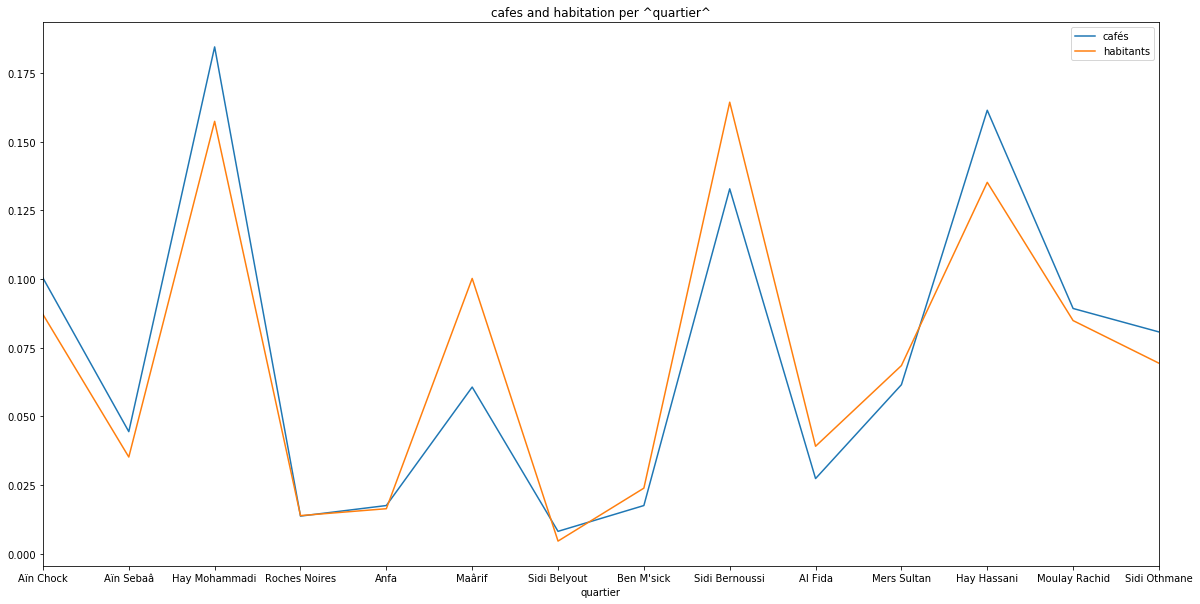

In [66]:
import matplotlib.pyplot as plt
ax=df3.plot(kind='line', 
             alpha=1, 
             stacked=False,
             figsize=(20, 10),
            )

plt.title('cafes and habitation per ^quartier^')
plt.xlabel('quartier')
plt.xticks()
ax.set_xticks(range(len(df3.index)))
ax.set_xticklabels(df3.index)

plt.show()

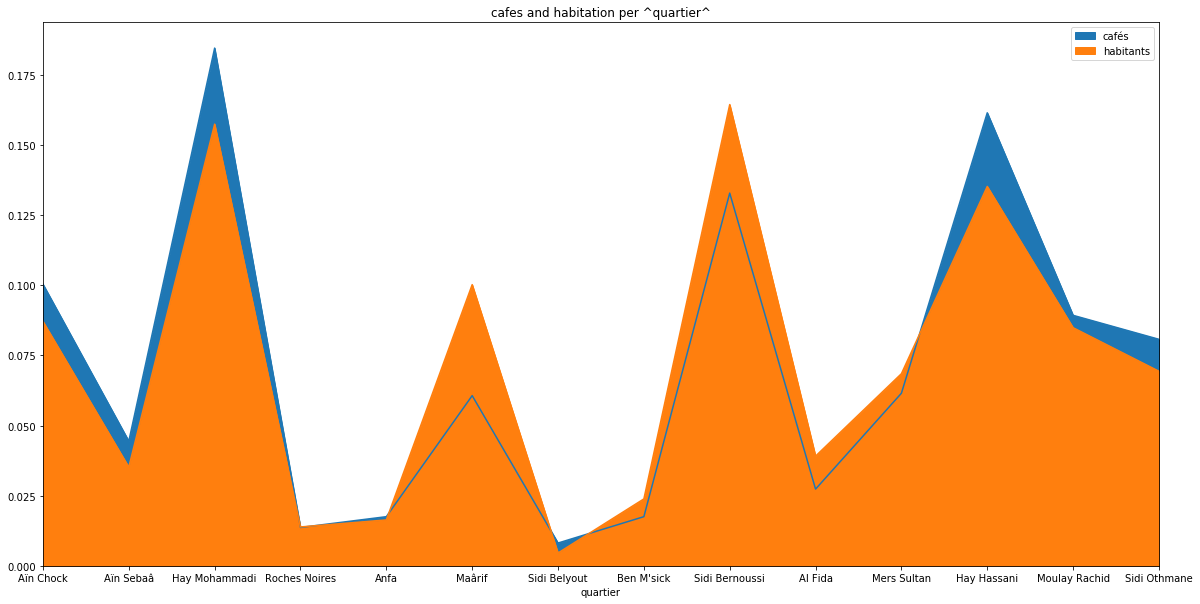

In [67]:

ax=df3.plot(kind='area', 
             alpha=1, # 0-1, 
             stacked=False,
             figsize=(20, 10),
            )

plt.title('cafes and habitation per ^quartier^')
plt.xlabel('quartier')
ax.set_xticks(range(len(df3.index)))
ax.set_xticklabels(df3.index)
plt.show()

We can notice in the figures that we have a strong correlation between the two variables (number of cafes and habitation per neighborhood)
We can notice also that ‘Maarif’ has a small number of cafes depanding to its habitation in comparison with other neighborhoods. So it will be a good place to start our project, the demand here is still incremental and cafes are the first interest of people of this neighborhood


I made also some researches about this quartier (neighborhood) and i found that is one of the safest neighborhoods in casablanca, and the infrastructure of this quartier is one of the best in this city
